In [1]:
# import modules
from matrix_utils import targets_ykr_ids, get_travel_times_to_targets, add_min_travel_times_to_df, add_population_to_travel_times, calculate_cumulative_pop

import glob
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
# read files
grid = gpd.read_file('data/MetropAccess_YKR_grid_EurefFIN.shp')
targets = gpd.read_file('data/movie_theaters/teatteri_tyo.shp')
ykr_pop = pd.read_csv('results/ykr_pop_join.csv')

In [3]:
# get ykr_ids for targets
target_ids = targets_ykr_ids(grid, targets)

CRS match: True
YKR ids: [5977006, 5978636, 5975374, 5975372, 5975376, 5977010, 5977009, 5961890, 5961894, 5965417, 5968790, 5934891, 5900206, 5879925, 5879940, 5848250]


In [4]:
# get traveltimes 2015 to targets 
folder15 = 'data/HelsinkiRegion_TravelTimeMatrix2015/'
ttimes15 = get_travel_times_to_targets(grid, target_ids, folder15, '15')
ttimes15 = add_min_travel_times_to_df(ttimes15)
ttimes_pop_15 = add_population_to_travel_times(ttimes15, ykr_pop)
cum_pops_15 = calculate_cumulative_pop(ttimes_pop_15)

dropped 211 rows with na values


/Users/joose/Documents/hy/qmslup-poster/matrix_utils.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ttimes['min_t'] = [int(value) for value in ttimes['min_t']]


In [5]:
# get traveltimes 2018 to targets 
folder18 = 'data/HelsinkiTravelTimeMatrix2018/'
ttimes18 = get_travel_times_to_targets(grid, target_ids, folder18, '18')
ttimes18 = add_min_travel_times_to_df(ttimes18)
ttimes_pop_18 = add_population_to_travel_times(ttimes18, ykr_pop)
cum_pops_18 = calculate_cumulative_pop(ttimes_pop_18)

dropped 127 rows with na values


/Users/joose/Documents/hy/qmslup-poster/matrix_utils.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ttimes['min_t'] = [int(value) for value in ttimes['min_t']]


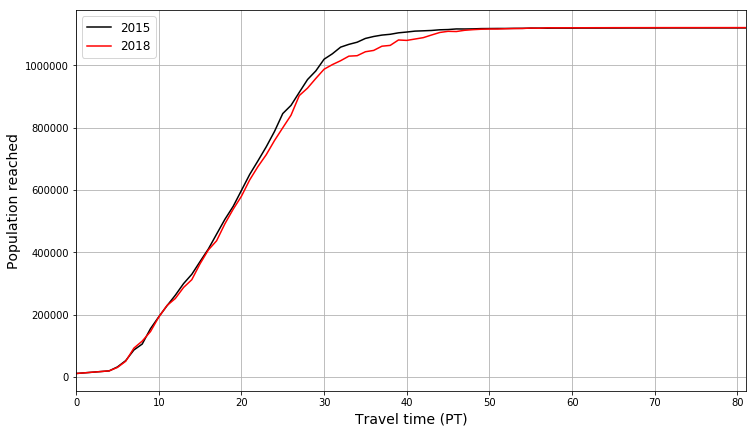

In [7]:
# PLOTS
import matplotlib.pyplot as plt

# prepare fig & ax for plotting
fig, ax = plt.subplots(figsize=(12,7))

# plot data
ax.plot(cum_pops_15['time'], cum_pops_15['cumpopulation'], c='black', label='2015')
ax.plot(cum_pops_18['time'], cum_pops_18['cumpopulation'], c='red', label='2018')

# set labels
ax.set(xlabel='Travel time (PT)', ylabel='Population reached')

# set axis & ticks
ax.set_xlim([0,81])
ax.grid()
# ticks every 10
major_ticks = np.arange(0, 81, 10)
ax.set_xticks(major_ticks)

# set font size
plt.rcParams.update({'font.size': 12})
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# add legend
ax.legend()

# save plot
fig.savefig('plots/pop_curve_test.png', dpi=150)
fig.savefig('plots/pop_curve_test.eps', format='eps', dpi=1000)

# show plot
plt.show()